# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets

In [ ]:
df = pd.read_csv('../data/raw/train.csv')

In [ ]:
df_2 = pd.read_csv('../data/raw/test.csv')

In [ ]:
df = pd.concat([df, df_2], ignore_index=True)

In [ ]:
df.to_parquet('../data/raw/full.parquet.gzip', compression='gzip', index=False)

In [3]:
df_weather = pd.read_csv('../data/external/weather_unify.csv')

In [4]:
df['year_month_day'] = df['pickup_datetime'].astype(str).str[0:10].str.replace('-', '')

In [5]:
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,year_month_day
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,20160630
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,20160630
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,20160630
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,20160630
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,20160630


In [6]:
df_weather['year_month_day'] = df_weather['Year'].astype(str) + df_weather['Month'].astype(str).str.zfill(2) + df_weather['Day'].astype(str).str.zfill(2)

In [7]:
df_weather.head()

,Unnamed: 0,Day,Month,daily_preciptation_normal_inches,max_temperature_normal_f,min_temperature_normal_f,avg_temperature_normal_f,Year,year_month_day
0,0,1,1,0.12,41,30,35,2016,20160101
1,1,2,1,0.12,40,30,35,2016,20160102
2,2,3,1,0.11,40,29,35,2016,20160103
3,3,4,1,0.13,40,29,35,2016,20160104
4,4,5,1,0.12,40,29,35,2016,20160105


In [8]:
df_weather.columns

Index(['Unnamed: 0', 'Day', 'Month', 'daily_preciptation_normal_inches',
       'max_temperature_normal_f', 'min_temperature_normal_f',
       'avg_temperature_normal_f', 'Year', 'year_month_day'],
      dtype='object')

In [9]:
df_interim = df.merge(df_weather[['year_month_day', 'daily_preciptation_normal_inches',
                                  'max_temperature_normal_f', 'min_temperature_normal_f',
                                  'avg_temperature_normal_f']], on='year_month_day', how='left')

In [10]:
df_interim.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,year_month_day,daily_preciptation_normal_inches,max_temperature_normal_f,min_temperature_normal_f,avg_temperature_normal_f
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,20160630,0.13,84,69,76
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,20160630,0.13,84,69,76
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,20160630,0.13,84,69,76
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,20160630,0.13,84,69,76
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,20160630,0.13,84,69,76


In [11]:
df_interim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 14 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id                                625134 non-null  object 
 1   vendor_id                         625134 non-null  int64  
 2   pickup_datetime                   625134 non-null  object 
 3   passenger_count                   625134 non-null  int64  
 4   pickup_longitude                  625134 non-null  float64
 5   pickup_latitude                   625134 non-null  float64
 6   dropoff_longitude                 625134 non-null  float64
 7   dropoff_latitude                  625134 non-null  float64
 8   store_and_fwd_flag                625134 non-null  object 
 9   year_month_day                    625134 non-null  object 
 10  daily_preciptation_normal_inches  625134 non-null  float64
 11  max_temperature_normal_f          625134 non-null  i

# City Bounds

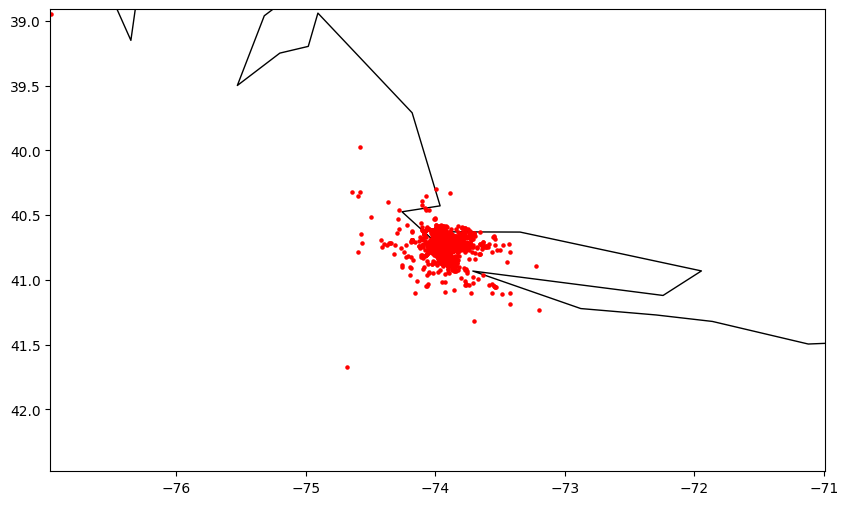

In [18]:
geometry = [Point(xy) for xy in zip(df_interim['pickup_longitude'], df_interim['pickup_latitude'])]
gdf = GeoDataFrame(df_interim, geometry=geometry)

world = gpd.read_file(geodatasets.data.naturalearth.land['url'])

base = world.plot(figsize=(10, 6), color='white', edgecolor='black')

gdf.plot(ax=base, marker='o', color='red', markersize=5)

# Got lat/long from justin-hj-kim
plt.xlim(-74.03-2, -73.75+2)  # NY Long + 2
plt.ylim(40.63+2, 40.85-2)  # NY Lat + 2

plt.gca().set_aspect('equal', adjustable='datalim')
plt.show()

In [12]:
# Cutoff observations outsite nyc bounds

west, south, east, north = -74.03, 40.63, -73.77, 40.85

print(df_interim.shape)

df_interim = df_interim[
    (df_interim['pickup_latitude'] >= south) &
    (df_interim['pickup_latitude'] <= north) &
    (df_interim['pickup_longitude'] >= west) &
    (df_interim['pickup_longitude'] <= east)
].reset_index(drop=True)

print(df_interim.shape)

(625134, 14)
(624255, 14)


# Drop Unused Columns

In [13]:
# Only for train dataset
if 'dropoff_datetime' in df_interim.columns:
    df_interim = df_interim.drop(columns=['dropoff_datetime', 'trip_duration'])

# Cast and Missing Input

In [38]:
cast_dict = {
    'int32' : ['vendor_id', 'passenger_count', 'year_month_day', 
             'max_temperature_normal_f', 'min_temperature_normal_f', 
             'avg_temperature_normal_f'],
    'float32' : ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 
                 'dropoff_latitude', 'daily_preciptation_normal_inches'],
    'datetime[64]' : ['pickup_datetime']
}

In [42]:
class FixVariable():
    """Class to fix variable's type and missing values
    """

    def __init__(self, cast_dict):

        self.cast_dict = cast_dict

        self.type_function = {
            'float32' : np.float32,
            'float64' : np.float64,
            'str' : str,
            'int64' : np.int64,
            'int32' : np.int32,
            'datetime[64]' : 'datetime64[s]'
        }

    def fit(self, X, y=None):
        return self

    def fix_type(self, X):
        for type, columns in self.cast_dict.items():
            X[columns] = X[columns].astype(self.type_function[type])
        return X
    
    def fix_missing(self, X):
        return X

    def transform(self, X):
        X_tmp = X.reset_index(drop=True)
        X_tmp = self.fix_missing(X_tmp)
        X_tmp = self.fix_type(X_tmp)
        return X_tmp

In [43]:
fix_vars = FixVariable(cast_dict)

In [47]:
df_interim = fix_vars.transform(df_interim)

In [48]:
df_interim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624255 entries, 0 to 624254
Data columns (total 14 columns):
 #   Column                            Non-Null Count   Dtype        
---  ------                            --------------   -----        
 0   id                                624255 non-null  object       
 1   vendor_id                         624255 non-null  int32        
 2   pickup_datetime                   624255 non-null  datetime64[s]
 3   passenger_count                   624255 non-null  int32        
 4   pickup_longitude                  624255 non-null  float32      
 5   pickup_latitude                   624255 non-null  float32      
 6   dropoff_longitude                 624255 non-null  float32      
 7   dropoff_latitude                  624255 non-null  float32      
 8   store_and_fwd_flag                624255 non-null  object       
 9   year_month_day                    624255 non-null  int32        
 10  daily_preciptation_normal_inches  624255 non

In [49]:
df_interim.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,year_month_day,daily_preciptation_normal_inches,max_temperature_normal_f,min_temperature_normal_f,avg_temperature_normal_f
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,20160630,0.13,84,69,76
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,20160630,0.13,84,69,76
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,20160630,0.13,84,69,76
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,20160630,0.13,84,69,76
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,20160630,0.13,84,69,76


In [53]:
df_interim.to_parquet(
    '../data/interim/interim.parquet.gzip',
    compression='gzip',
    index=False
)